In [1]:
import pandas as pd
import matplotlib
pd.set_option('display.max_colwidth', None)

In [2]:
addr_amount = []
for f in range(1,4):
    df = pd.read_json(f'../data/levana_airdrop{f}.json')
    for tx in df.data.address['txs']:
        txhash = tx['txhash']
        for message in tx['messages']:
            if 'msg' in message['msg']['value']:
                if 'transfer' in message['msg']['value']['msg']:
                    for i in message['msg']['value']['msg']['transfer']['recipients']:
                        addr_amount.append((txhash, i['addr'],int(i['coins'][0]['amount'])/1000000))

In [3]:
df = pd.DataFrame(addr_amount, columns=['txhash','address','lvn'])

In [4]:
df.sort_values('lvn')

,txhash,address,lvn
2895,0BE8E1D96AFD801D31C23A161E660172F35B95D6242C1505FB658A1406BF9255,osmo1apj9cr7h9pgllcs0jw8ny0m33n86snd50yzh7f,0.038865
2869,0BE8E1D96AFD801D31C23A161E660172F35B95D6242C1505FB658A1406BF9255,osmo1a90s8ryjz95ssxzpvl4ltujptj89594xd722al,0.038865
2868,0BE8E1D96AFD801D31C23A161E660172F35B95D6242C1505FB658A1406BF9255,osmo189mvejd5kcsnw6nd4wsfkerqm0vzn5wgv59dpf,0.038865
2867,0BE8E1D96AFD801D31C23A161E660172F35B95D6242C1505FB658A1406BF9255,osmo1qws9m4zmf484rkhhmp6uq26rupdvdavjyk68d7,0.038865
2866,0BE8E1D96AFD801D31C23A161E660172F35B95D6242C1505FB658A1406BF9255,osmo1na3xkktpzgq8fy5nj9xhk2skmd7pwnuedkjhkg,0.038865
...,...,...,...
26,EEBFD3D5A0933D19E9E2AEF72591BA759E7C87F9BE3EAB30D6A850EAB80B612A,osmo1szce6wx7gg3884nt0mkehtx6j79kl22lmxxeha,120000.000000
34,EEBFD3D5A0933D19E9E2AEF72591BA759E7C87F9BE3EAB30D6A850EAB80B612A,osmo1gqn56ztqjjff5v4h4335n7djnd7knqvprs54cy,124964.467792
37,EEBFD3D5A0933D19E9E2AEF72591BA759E7C87F9BE3EAB30D6A850EAB80B612A,osmo1zqztj8manrpanh4mlzuscqxxq7srq6rxtzeus0,380190.674870
1,EEBFD3D5A0933D19E9E2AEF72591BA759E7C87F9BE3EAB30D6A850EAB80B612A,osmo17d34cxnqdyh26mmahnz856m66z2vaxwhfu2vjn,736475.438520


In [32]:
df.address.nunique()

2896

In [5]:
df['lvn'].sum()

10311941.0152

In [6]:
df.describe()

,lvn
count,2896.000000
mean,3560.753113
std,23455.840882
min,0.038865
25%,182.740392
50%,656.145861
75%,2329.976330
max,835951.737151


<Axes: xlabel='Amount of LVN'>

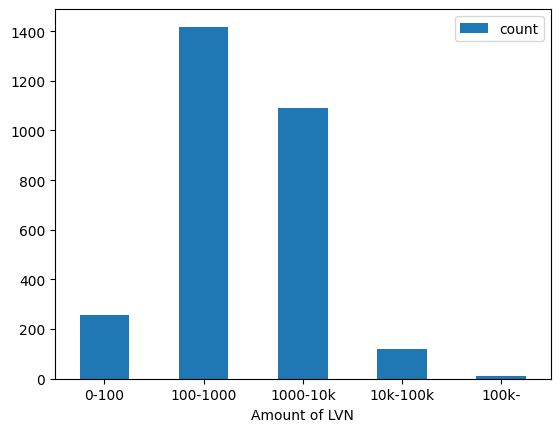

In [22]:
bins = [0, 100, 1000, 10000, 100000, float('inf')]  # Add float('inf') to include all values above 150

# Create bins and count values in each bin
bin_labels = ['0-100', '100-1000', '1000-10k', '10k-100k','100k-']  # Labels for the bins
df['lvn_bin'] = pd.cut(df['lvn'], bins=bins, labels=bin_labels, right=False)

# Count the number of rows in each bin
bin_counts = df['lvn_bin'].value_counts().reset_index()
bin_counts.columns = ['Amount of LVN', 'count']

# Print the counts
bin_counts.set_index('Amount of LVN').sort_index().plot(kind='bar', rot=0)

In [33]:
bin_counts

,Amount of LVN,count
0,100-1000,1418
1,1000-10k,1092
2,0-100,258
3,10k-100k,119
4,100k-,9


In [48]:
df['Amount of LVN receivied'] = df['lvn'].apply(lambda x: int(x))

In [49]:
top = df.sort_values('lvn', ascending=False).head(9)

In [50]:
top.reset_index()[['address','Amount of LVN receivied']]

,address,Amount of LVN receivied
0,osmo1qfv9lka8kxtumxj0drrqsxkqug40nfmm0p3jne,835951
1,osmo17d34cxnqdyh26mmahnz856m66z2vaxwhfu2vjn,736475
2,osmo1zqztj8manrpanh4mlzuscqxxq7srq6rxtzeus0,380190
3,osmo1gqn56ztqjjff5v4h4335n7djnd7knqvprs54cy,124964
4,osmo1szce6wx7gg3884nt0mkehtx6j79kl22lmxxeha,120000
5,osmo1rq98esw4lgcekya6yyksktrppcwe2hhcpgm68v,119992
6,osmo13744ecfwf85knq8l3u3zt9ctg52q9n42ss3drg,119080
7,osmo1tkvp6yhem77f5cz39yyxhw422tm4qcu53gre5w,100946
8,osmo14y4jfkpvga84w88wm6lget9c6fv4gcxjxc5ens,100352


In [40]:
top['lvn'].sum()/df['lvn'].sum()*100

15.248605217516392